In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
data = pd.read_csv('german_credit.csv')

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.drop("default", axis=1)
y = data["default"]
test_size = 0.50 # taking 50% training and test set
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

(500, 61)

In [11]:
data_df = pd.get_dummies(data)

In [12]:
data_df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [14]:
data.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


### Drop the original variables which are converted to dummy

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [21]:
X = data_df.drop("default", axis=1)
y = data_df["default"]
test_size = 0.70 # taking 70:30 training and test set
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
Rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)

In [24]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [25]:
ypred=Rf_model.predict(X_test)

In [26]:
from sklearn import metrics

In [27]:
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)

[[452  39]
 [140  69]]


In [28]:
acc=metrics.accuracy_score(y_test,ypred)
print(acc)

0.7442857142857143


### Q6 Show the list of the features importance( 1 Marks)

In [29]:
print(Rf_model.feature_importances_)

[0.08068997 0.09601949 0.03770409 0.03774858 0.07587518 0.0172345
 0.01123115 0.0160722  0.0300784  0.00555899 0.03964121 0.01780403
 0.02203647 0.00807217 0.01354198 0.00529808 0.02300937 0.01125204
 0.01281    0.01083244 0.01402888 0.00264127 0.00186728 0.012757
 0.00386718 0.00138462 0.00443718 0.02391671 0.00776463 0.00713703
 0.01604762 0.01352512 0.01592988 0.01444653 0.0127597  0.00527739
 0.01607849 0.01170231 0.00848204 0.01688891 0.00409171 0.00849611
 0.00639587 0.01240499 0.01610382 0.02133575 0.00980167 0.01490826
 0.01637696 0.00561431 0.00575643 0.01365778 0.00928567 0.00970625
 0.0179075  0.0022193  0.0126892  0.01272357 0.01245221 0.00216188
 0.0024607 ]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
# Use below values
num_folds = 10
seed = 77

In [32]:
#Validate the Random Forest model build above using k fold

In [34]:
from sklearn import model_selection

In [36]:
kfold = model_selection.KFold(n_splits=10,random_state=77)
cv_results = model_selection.cross_val_score(Rf_model, X, y, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (Rf_model, np.mean(cv_results), cv_results.var())

In [37]:
print(msg)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False): 0.396860 (0.016551)


In [0]:
#Calculate Mean score

In [38]:
np.mean(cv_results)

0.39685983946180226

In [0]:
# Calculate score standard deviation using std()

In [39]:
cv_results.std()

0.12865104923662588

# Q8 Print the confusion matrix( 1 Marks)

In [42]:
from sklearn.model_selection import cross_val_predict

In [43]:
y_pred2 = cross_val_predict(Rf_model, X, y, cv=kfold)

In [47]:
cm1=metrics.confusion_matrix(y,y_pred2)
print(cm1)

[[649  51]
 [184 116]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [48]:
ac=metrics.accuracy_score(y,y_pred2)
print(ac)

0.765


In [49]:
rc=metrics.recall_score(y,y_pred2)
print(rc)

0.38666666666666666


In [51]:
pr=metrics.precision_score(y,y_pred2)
print(pr)

0.6946107784431138


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [60]:
auc = roc_auc_score(y,y_pred2)

In [61]:
fpr, tpr, thresholds = roc_curve(y,y_pred2)

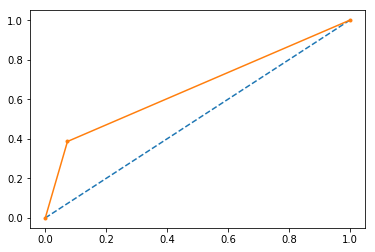

In [63]:
import matplotlib.pyplot as pyplot

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [64]:
auc = roc_auc_score(y,y_pred2)

In [65]:
print(auc)

0.6569047619047619


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
